In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "../")

In [2]:
# Env configs
from utils.librosa_cache import * 
enable_cache()

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import librosa
from librosa.display import specshow
from tensorflow.keras import layers, models, losses

from utils.constants import *
from utils.read_audio import *

from layers.cqt import *
from layers.harmonic_stacking import *
from models.transcriber import *

In [11]:
# Load the data

data, sr = read_file("../data/song.mp3")
data = data[0: sr * 10]
data

c:\Users\JOAQUIN DELA ROSA\anaconda3\envs\tfgpu\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


array([0.        , 0.        , 0.        , ..., 0.5733032 , 0.60398865,
       0.6446686 ], dtype=float32)

In [12]:
input_data = np.array(data)
input_data.shape

(441000,)

In [13]:
# Test if model works.
tf.config.run_functions_eagerly(True)
model = Transcriber([i for i in range(1, 8)])
model.compile(optimizer="adam", loss=losses.binary_crossentropy, run_eagerly=True)

In [20]:
y = model(input_data)

In [15]:
model.summary()

Model: "transcriber_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cqt_1 (CQT)                  multiple                  0         
_________________________________________________________________
harmonic_stacking_1 (Harmoni multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  2816      
_________________________________________________________________
batch_normalization_2 (Batch multiple                  64        
_________________________________________________________________
re_lu_2 (ReLU)               multiple                  0         
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  14984     
_________________________________________________________________
batch_normalization_3 (Batch multiple                

In [21]:
y = np.transpose(y['yn'][0])
y = y.reshape((206, -1))
y.shape

(206, 852)

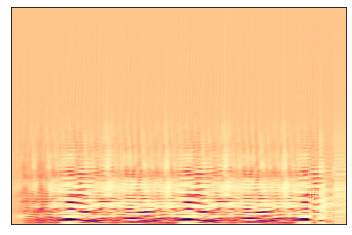

In [22]:
# For viewing the model
import librosa
from librosa.display import specshow
specshow(librosa.amplitude_to_db(y, ref=np.max))

In [10]:
purge_cache()